# Análisis de Tendencias de la Empresa "ICE"

### Descripción de los datos

In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Leemos el conjunto de datos en un DataFrame
games = pd.read_csv('/datasets/games.csv')

# Imprimimos el head del df
print(games.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [3]:
# Mostramos la información del DataFrame "games"
print("INFORMACÓN DEL DF")
print(games.info())
print("--------------------------------------------------------------------")

# Mostramos la información del DataFrame "games"
print("ESTADÍSTICA DESCRIPTIVA DEL DF")
print(games.describe())

INFORMACÓN DEL DF
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
--------------------------------------------------------------------
ESTADÍSTICA DESCRIPTIVA DEL DF
       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000

### Preparación de los datos

In [4]:
# Reemplazamos los nombres de las columnas en minúsculas
games.columns = games.columns.str.lower()

In [5]:
# Imprimimos las columnas para verificar el cambio
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [6]:
# Convierte los datos en los tipos necesarios
# Primero inspeccionamos los tipos actuales
print(games.dtypes)

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


**Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.**

Gracias a la descripción de datos sabemos lo que contiene cada columna. Por ende, y viendo los tipos de datos de cada columna, sabemos que tenemos que cambiar el tipo de datos de las siguientes columnas: 
+ name - String
+ platform - String
+ year_of_release - DateTime
+ genre - String
+ user_score - String (Debido a que en esta columna contienen valores "tbd"
+ rating - String

genre, name, platform, rating: Se cambiaron a string. Estas columnas contienen texto, por lo que convertirlas a tipo str asegura que se manejen correctamente para tareas de categorización, filtrado y análisis de texto.

user_score: Se convirtió a float. Esto se hizo porque los valores numéricos representan calificaciones y deben ser tratados como números para realizar cálculos, como el cálculo de promedios, sin afectar el análisis. Los valores 'tbd' se reemplazaron por NaN para mantener la integridad de los datos.

year_of_release: Se convirtió a datetime utilizando pd.to_datetime(). Esto permite que la fecha de lanzamiento sea tratada de manera adecuada para análisis relacionados con el tiempo, como el cálculo de tendencias a lo largo de los años.



In [7]:
# Reemplazamos los valores "tbd" a valores nulos
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [8]:
# Cambiamos el tipo de dato de cada columna
games['name'] = games['name'].astype('string')
games['platform'] = games['platform'].astype('string')
games['year_of_release'] = pd.to_datetime(games['year_of_release'])
games['genre'] = games['genre'].astype('string')
games['user_score'] = games['user_score'].astype('float')
games['rating'] = games['rating'].astype('string')

In [9]:
# Imprimimos los tipos de datos para corroborar que el cambio se hizo
print(games.dtypes)

name                       string
platform                   string
year_of_release    datetime64[ns]
genre                      string
na_sales                  float64
eu_sales                  float64
jp_sales                  float64
other_sales               float64
critic_score              float64
user_score                float64
rating                     string
dtype: object


**1) Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.**

Se reemplazaron los valores 'tbd' y '' con np.nan para mantener consistencia y facilitar cálculos y análisis posteriores, ya que pandas maneja np.nan de manera eficiente.

**2) ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.**

Los valores ausentes pueden deberse a falta de calificaciones de usuarios, errores en la recopilación de datos o que ciertos juegos aún no han sido calificados.

**3) Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.**

Los valores 'tbd' se trataron como NaN, ya que indican que la calificación aún está pendiente y no se ha determinado, evitando hacer suposiciones sobre su valor.

In [10]:
# Antes de tratar los valores ausentes, veremos en que columna tenemos (si es que hay)
print(games.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [11]:
# Tratamiento de valores austentes
games['name'] = games['name'].fillna('Nombre desconocido')
games['year_of_release'] = games['year_of_release'].fillna(pd.to_datetime('1950-01-01'))
games['genre'] = games['genre'].fillna('Sin género')
games['critic_score'] = games['critic_score'].fillna(games['critic_score'].median())
games['user_score'] = games['user_score'].fillna(games['user_score'].median())
games['rating'] = games['rating'].fillna('No clasificado')

In [12]:
# Imprimimos otra vez los datos nulos para ver si aún quedan
print(games.isnull().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


In [13]:
# Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

# Sumar las ventas en todas las regiones para cada juego
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [14]:
# Imprimimos el df "games" con la nueva columna
print(games)

                                name platform               year_of_release  \
0                         Wii Sports      Wii 1970-01-01 00:00:00.000002006   
1                  Super Mario Bros.      NES 1970-01-01 00:00:00.000001985   
2                     Mario Kart Wii      Wii 1970-01-01 00:00:00.000002008   
3                  Wii Sports Resort      Wii 1970-01-01 00:00:00.000002009   
4           Pokemon Red/Pokemon Blue       GB 1970-01-01 00:00:00.000001996   
...                              ...      ...                           ...   
16710  Samurai Warriors: Sanada Maru      PS3 1970-01-01 00:00:00.000002016   
16711               LMA Manager 2007     X360 1970-01-01 00:00:00.000002006   
16712        Haitaka no Psychedelica      PSV 1970-01-01 00:00:00.000002016   
16713               Spirits & Spells      GBA 1970-01-01 00:00:00.000002003   
16714            Winning Post 8 2016      PSV 1970-01-01 00:00:00.000002016   

              genre  na_sales  eu_sales  jp_sales  

### Análisis de los datos

In [15]:
# Antes de analizar los datos, vamos a convertir los valores de 'year_of_release' a cadenas, extraemos los últimos 4 caracteres, y los convertimos a enteros
games['year_of_release'] = games['year_of_release'].astype(str).str[-4:].astype(int)

# Revisamos los cambios
print(games['year_of_release'].head())

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64


In [16]:
# Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

# Contamos el número de juegos lanzados por año
games_per_year = games['year_of_release'].value_counts().sort_index()

# Mostramos el conteo de lanzamientos por año
print(games_per_year)

0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64


**¿Son significativos los datos de cada período?**

La distribución de lanzamientos de videojuegos por año muestra un crecimiento significativo desde la década de 1990, alcanzando su punto máximo entre 2006 y 2011, lo que indica que estos períodos son particularmente representativos en la industria de los videojuegos. Los datos con año "0" representan valores originalmente nulos y podrían no ser significativos para el análisis de tendencias temporales. Los períodos anteriores a 1990 tienen menos lanzamientos, lo que podría deberse a registros incompletos o a una menor producción de juegos en esa época.

In [17]:
# Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

# Primero calculamos las ventas totales por plataforma
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Seleccionamos el top 5 de plataformas con mayores ventas totales
top_platforms = platform_sales.head(5).index

# Mostramos las ventas del top 5 de plataformas
top_platform_sales = games[games['platform'].isin(top_platforms)]

# Imprimimos este top 5
print(top_platforms)
print("--------------------------------------------------------------------------------")
print(top_platform_sales)

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')
--------------------------------------------------------------------------------
                                                   name platform  \
0                                            Wii Sports      Wii   
2                                        Mario Kart Wii      Wii   
3                                     Wii Sports Resort      Wii   
6                                 New Super Mario Bros.       DS   
7                                              Wii Play      Wii   
...                                                 ...      ...   
16700                          Mezase!! Tsuri Master DS       DS   
16704                                          Plushees       DS   
16709  SCORE International Baja 1000: The Official Game      PS2   
16710                     Samurai Warriors: Sanada Maru      PS3   
16711                                  LMA Manager 2007     X360   

       year_of_release    

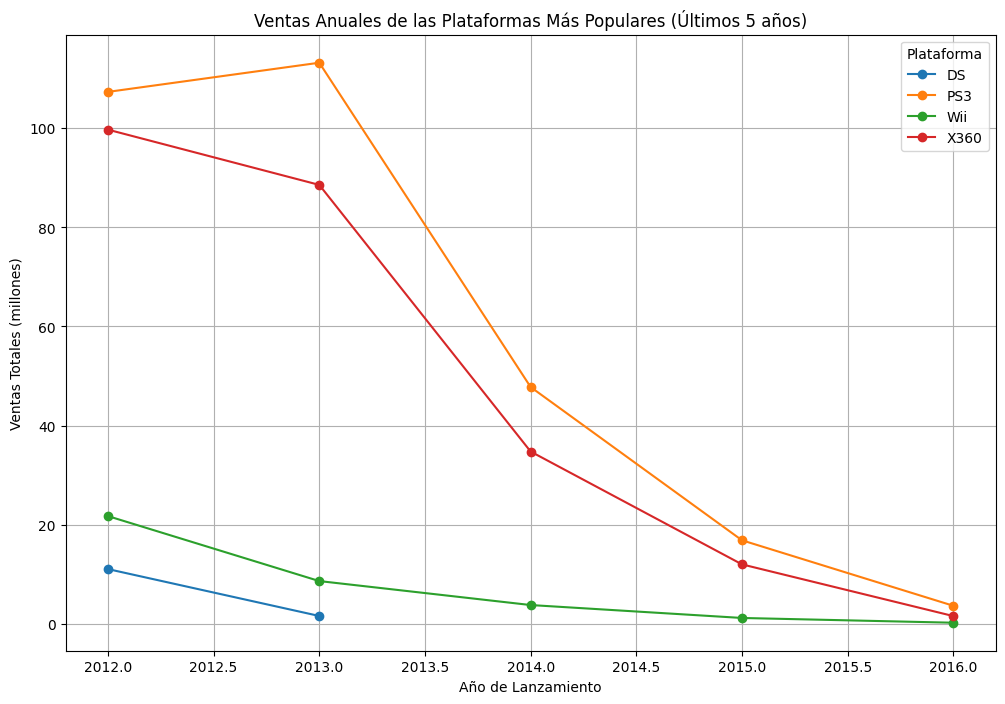

In [18]:
# Creamos una distribución de ventas anuales para cada una de estas top 5 plataformas

# Excluimos los valores donde 'year_of_release' es "0"
top_platform_sales_non_zero_year = top_platform_sales[top_platform_sales['year_of_release'] > 0]

# Determinamos el año más reciente en los datos
max_year = top_platform_sales_non_zero_year['year_of_release'].max()

# Filtramos los datos para incluir solo los últimos 5 años desde el año más reciente
filtered_sales = top_platform_sales_non_zero_year[
    top_platform_sales_non_zero_year['year_of_release'] >= (max_year - 4)
]

# Agrupamos por año y plataforma, sumando las ventas para cada combinación
yearly_sales_filtered = filtered_sales.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Graficamos la evolución de las ventas por año para cada plataforma, excluyendo los años con "0"
yearly_sales_filtered.plot(kind='line', figsize=(12, 8), marker='o')
plt.title("Ventas Anuales de las Plataformas Más Populares (Últimos 5 años)")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Ventas Totales (millones)")
plt.legend(title="Plataforma")
plt.grid()
plt.show()

In [19]:
# Primero filtrarmos el DataFrame para excluir los años con valor "0" debido a que son los datos nulos del inicio
filtered_games = games[games['year_of_release'] != 0]

# Calculamos el primer y último año de ventas para cada plataforma
platform_life_span = filtered_games.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()

# Excluimos las plataformas que tengan un valor mínimo de año igual a 0
platform_life_span = platform_life_span[platform_life_span['min'] != 0]

# Calculamos el ciclo de vida de cada plataforma
platform_life_span['life_span'] = platform_life_span['max'] - platform_life_span['min']

# Mostramos las plataformas con su ciclo de vida
print(platform_life_span[['platform', 'min', 'max', 'life_span']])

   platform   min   max  life_span
0      2600  1980  1989          9
1       3DO  1994  1995          1
2       3DS  2011  2016          5
3        DC  1998  2008         10
4        DS  1985  2013         28
5        GB  1988  2001         13
6       GBA  2000  2007          7
7        GC  2001  2007          6
8       GEN  1990  1994          4
9        GG  1992  1992          0
10      N64  1996  2002          6
11      NES  1983  1994         11
12       NG  1993  1996          3
13       PC  1985  2016         31
14     PCFX  1996  1996          0
15       PS  1994  2003          9
16      PS2  2000  2011         11
17      PS3  2006  2016         10
18      PS4  2013  2016          3
19      PSP  2004  2015         11
20      PSV  2011  2016          5
21      SAT  1994  1999          5
22      SCD  1993  1994          1
23     SNES  1990  1999          9
24     TG16  1995  1995          0
25       WS  1999  2001          2
26      Wii  2006  2016         10
27     WiiU  2012  2

**¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?**

Viendo el análsis podemos ver que normalmente, las plataformas nuevas aparecen y alcanzan popularidad en 1 a 2 años después de su lanzamiento, si son exitosas. Además, vemos que una plataforma generalmente permanece relevante en el mercado entre 5 y 10 años, aunque algunas plataformas populares pueden durar más, como por ejemplo la "DS". Al final de su ciclo de vida, las ventas suelen disminuir durante 1 a 3 años hasta que desaparecen del mercado.

**Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.**

En base a las ventas y la longevidad de las plataformas, un buen período de datos sería entre 2005 y 2017, ya que este intervalo cubre tanto las plataformas que se lanzaron antes de 2017 como las que todavía están activas en ese año.

In [20]:
# Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

# Para ello debemos filtrar los datos de 2005 - 2016
filtered_data = games[(games['year_of_release'] >= 2005) & (games['year_of_release'] <= 2017)]

# Verificamos el resultado
print(filtered_data[['year_of_release', 'platform', 'total_sales']])

       year_of_release platform  total_sales
0                 2006      Wii        82.54
2                 2008      Wii        35.52
3                 2009      Wii        32.77
6                 2006       DS        29.80
7                 2006      Wii        28.91
...                ...      ...          ...
16709             2008      PS2         0.00
16710             2016      PS3         0.01
16711             2006     X360         0.01
16712             2016      PSV         0.01
16714             2016      PSV         0.01

[11272 rows x 3 columns]


In [21]:
# ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

# Primero agrupamos por plataforma y calculamos las ventas totales
total_sales_per_platform = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Mostrar las plataformas con mayores ventas
print("Plataformas líderes en ventas:")
print(" ")
print(total_sales_per_platform)

Plataformas líderes en ventas:
 
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


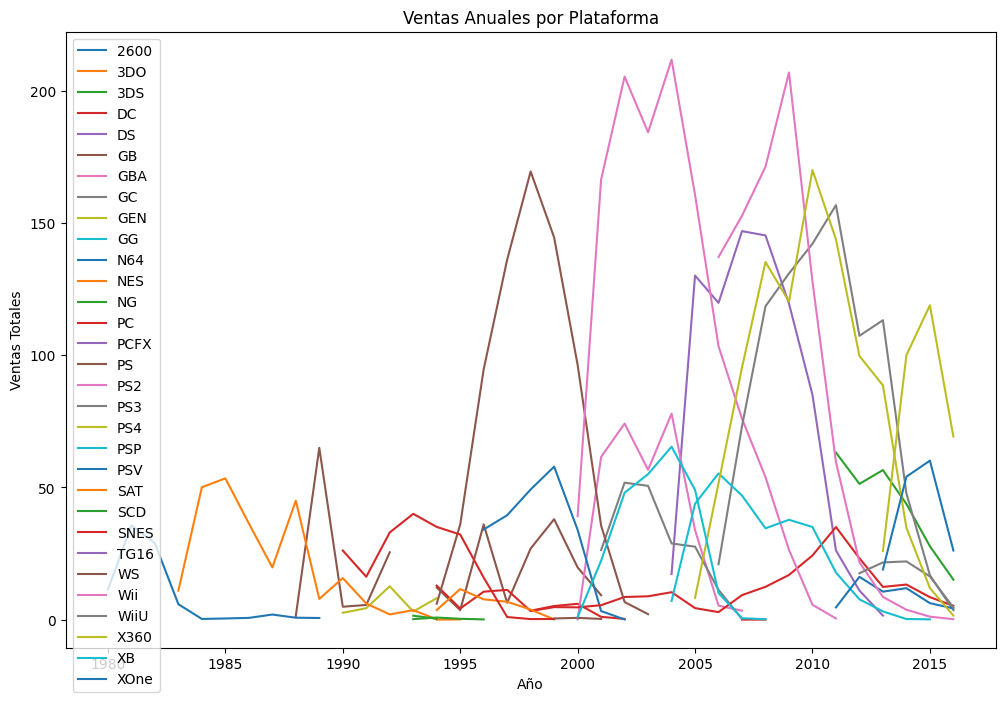

In [22]:
# Agrupar por año y plataforma para ver las ventas anuales por plataforma

# Primer excuimos los datos con año "0"
sales_per_year_and_platform = games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
sales_per_year_and_platform = sales_per_year_and_platform[sales_per_year_and_platform.index != 0]

# Visualizamos las tendencias de ventas por plataforma, excluyendo el año 0
plt.figure(figsize=(12, 8))
for platform in sales_per_year_and_platform.columns:
    plt.plot(sales_per_year_and_platform.index, sales_per_year_and_platform[platform], label=platform)

plt.xlabel('Año')
plt.ylabel('Ventas Totales')
plt.title('Ventas Anuales por Plataforma')
plt.legend()
plt.show()

**Plataformas líderes:**

Las plataformas con mayores ventas totales, como PlayStation, Xbox y Nintendo, suelen ser las más exitosas en términos de volumen de ventas.

**Plataformas en crecimiento:**

Algunas plataformas nuevas como "Switch" o "Xbox Series X/S" pueden mostrar un aumento progresivo en ventas, indicando que están ganando popularidad.

**Plataformas en declive:**

Plataformas antiguas como "Wii" o "PS3" pueden mostrar una caída en ventas a medida que las nuevas generaciones de consolas ganan terreno.

**Plataformas potencialmente rentables:**


Plataformas que aún están en crecimiento pero tienen una buena adopción en los primeros años de su lanzamiento podrían ser plataformas a considerar como rentables a futuro. Ejemplo: la Nintendo Switch ha mostrado un buen desempeño en ventas, lo que la convierte en una plataforma prometedora para el futuro.

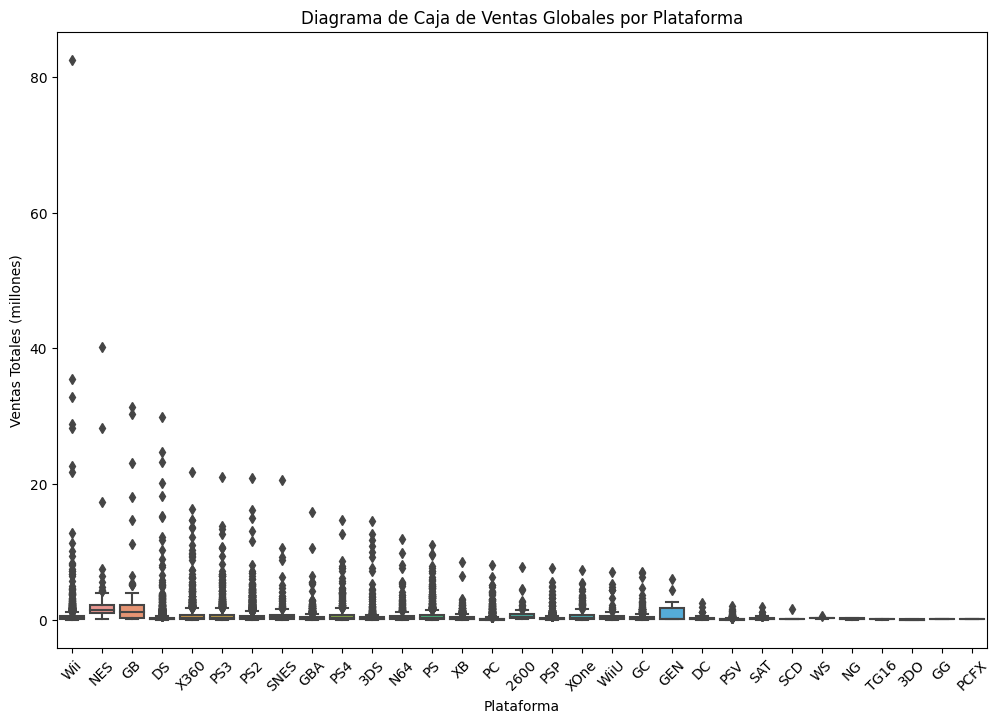

In [23]:
# Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 

plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=games)

# Personalizar el gráfico
plt.title('Diagrama de Caja de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.show()

**¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.**

Viendo la gráfica de caja y bigotes, puedo observar que la concentración (ditribución de cuartiles) está concentrado muy similar en todas las plataformas en un rango de 0 - 3 millones de ventas. Algo a notar es que las plataformas WII, NES, GB, DS y X360 tienen datos atípicos de ventas que llegan a los 40 millones en ventas, lo que nos quiere decir que estas paltaforms son las top en cuanto a ventas, teniendo años donde sus ventas crecen demasiado. Si nos vamos a las plataforams que menos venden, estas se concentran en los 0 milones de ventas y con muy pocos datos atípicos, lo que nos dice que durante los años estas plataformas no han dado ventas.

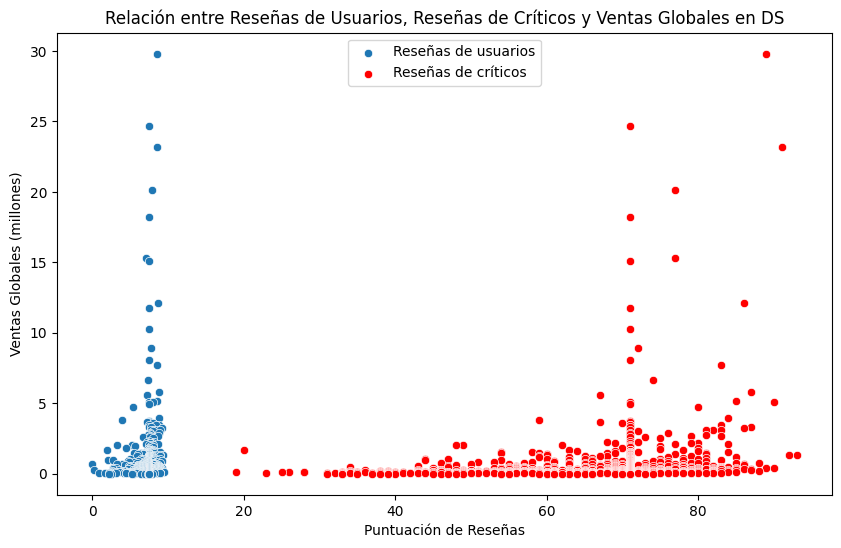

Correlación entre reseñas de usuarios y ventas globales: 0.05246427386910558
Correlación entre reseñas de críticos y ventas globales: 0.12254447346731703


In [24]:
# Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). 
# Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

# Filtramos los datos para la paltaforma 'DS'
platform_data = games[games['platform'] == 'DS']

# Eliminamos filas con valores ausentes en las columnas relevantes
platform_data = platform_data.dropna(subset=['user_score', 'critic_score', 'total_sales'])

# Creamos el gráfico de dispersión para las reseñas de usuarios y las ventas globales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=platform_data['user_score'], y=platform_data['total_sales'], label='Reseñas de usuarios')
sns.scatterplot(x=platform_data['critic_score'], y=platform_data['total_sales'], label='Reseñas de críticos', color='r')
plt.title('Relación entre Reseñas de Usuarios, Reseñas de Críticos y Ventas Globales en DS')
plt.xlabel('Puntuación de Reseñas')
plt.ylabel('Ventas Globales (millones)')
plt.legend()

# Mostramos gráfico
plt.show()

# Calculamos la correlación entre las reseñas de usuarios y las ventas globales
user_score_corr = platform_data['user_score'].corr(platform_data['total_sales'])
critic_score_corr = platform_data['critic_score'].corr(platform_data['total_sales'])

print(f"Correlación entre reseñas de usuarios y ventas globales: {user_score_corr}")
print(f"Correlación entre reseñas de críticos y ventas globales: {critic_score_corr}")

**Conclusiones**

Tanto las reseñas de usuarios como las de críticos tienen una relación muy débil con las ventas totales en esta plataforma.
Otros factores probablemente sean más importantes para determinar las ventas de los juegos, como la popularidad de la plataforma, la campaña de marketing o el apoyo de la comunidad.
Aunque las reseñas pueden tener un impacto en las ventas, no parecen ser el factor determinante en el caso de esta plataforma. Es posible que factores externos y el contexto más amplio del mercado de videojuegos jueguen un papel más importante.

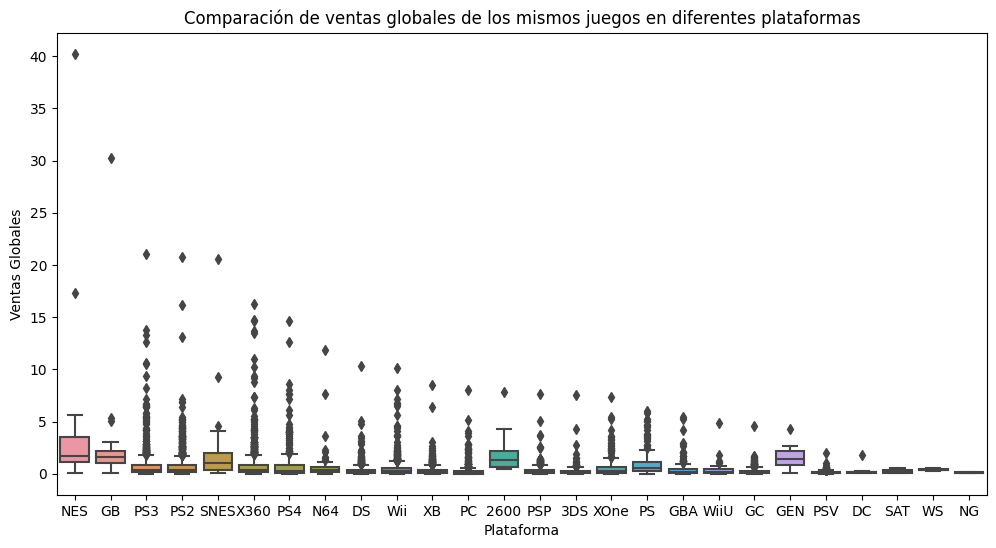

In [25]:
# Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

# Filtrar juegos que están disponibles en más de una plataforma
# Asegúrate de que los datos de ventas estén bien procesados y que el DataFrame contenga las columnas necesarias.

# Crear una lista de juegos que están en más de una plataforma
games_multiple_platforms = games.groupby('name').filter(lambda x: len(x['platform'].unique()) > 1)

# Crear un gráfico de barras o de dispersión para comparar las ventas por plataforma para los juegos comunes
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=games_multiple_platforms)
plt.title('Comparación de ventas globales de los mismos juegos en diferentes plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')
plt.show()

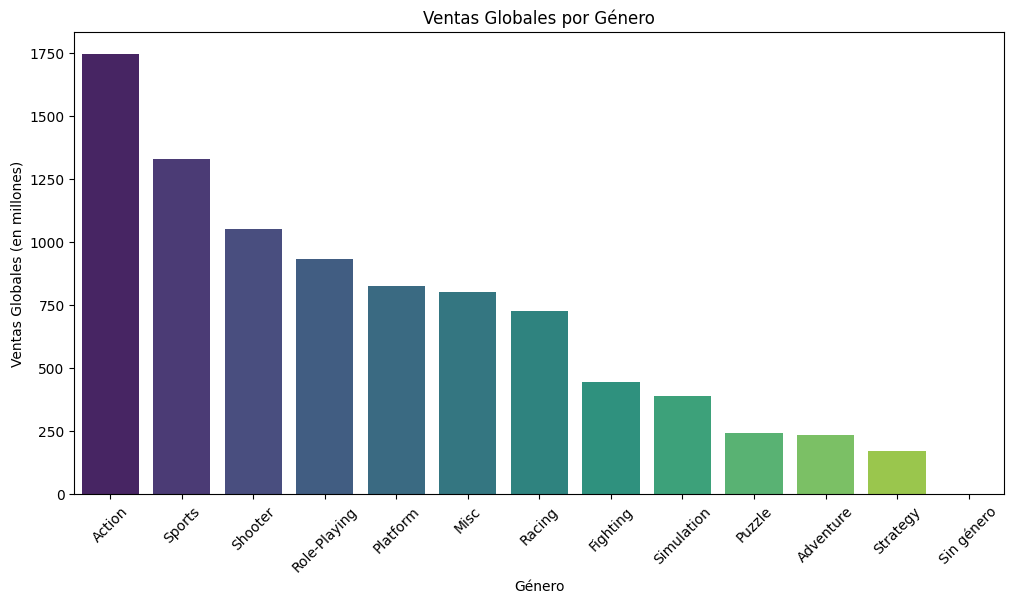

In [26]:
# Echa un vistazo a la distribución general de los juegos por género. 

# Agrupamos los juegos por género y sumamos las ventas totales
genre_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Creamos un gráfico de barras para ver las ventas por género
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')
plt.title('Ventas Globales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=45)
plt.show()

**¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?**

Los géneros con ventas altas suelen tener una base de jugadores amplia y accesible, como Acción, Deportes y Shooter. Estos géneros cuentan con franquicias exitosas que se actualizan constantemente y atraen tanto todo tipo de jugadores, lo que les permite dominar el mercado y generar experiencias de juego emocionantes para una gran audiencia.

Por otro lado, los géneros con ventas más bajas, como Simulación, Puzzle, Estrategia y Aventura, tienden a enfocarse en un público más especializado. Aunque estos géneros pueden ser exitosos dentro de su nicho, no alcanzan el mismo nivel de ventas masivas.

### Creación de perfil de usuario para cada región

**Para cada región (NA, UE, JP) determina:**

In [27]:
# 1) Las cinco plataformas principales.

# Primero agrupamos por plataforma y calcular las ventas por región
na_top_platforms = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_top_platforms = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_top_platforms = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Mostrar los resultados
print("Top 5 plataformas en NA:", na_top_platforms)
print("Top 5 plataformas en EU:", eu_top_platforms)
print("Top 5 plataformas en JP:", jp_top_platforms)

Top 5 plataformas en NA: platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64
Top 5 plataformas en EU: platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64
Top 5 plataformas en JP: platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


**Describe las variaciones en sus cuotas de mercado de una región a otra.**

Viendo las 5 plataformas con mayor venta en cada región, puedo concluir que la plataforma "PS2" está en el top 3 de las 3 regiones, por lo que puedo concluir que esa es la paltaforma más popular. Por otr lado, tenemos por ejemplo que la "X360", "Wii y "PS3" están en el top 5 de la región "NA" y "EU". El comportamiento es el mismo para el resto de plataformas que aparecen en el top 5 en cada región. Puede que en una región alguna plataforma sea popular pero en otra sea una plataforma completamente distinta.

In [28]:
# 2) Los cinco géneros principales. 

# Primero agrupamos por género y calculamos las ventas por región
na_top_genres = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_top_genres = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_top_genres = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Mostramos los resultados
print("Top 5 géneros en NA:", na_top_genres)
print("Top 5 géneros en EU:", eu_top_genres)
print("Top 5 géneros en JP:", jp_top_genres)

Top 5 géneros en NA: genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64
Top 5 géneros en EU: genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64
Top 5 géneros en JP: genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


**Explica la diferencia.**

Las diferencias en los géneros más populares por región reflejan las preferencias de cada mercado. En la región NA, los géneros de Acción, Deportes y Shooter dominan las ventas. En EU, aunque Acción y Deportes también están en los primeros lugares, el género Racing aparece en la cuarta posición. En JP, los géneros de Role-Playing y Acción lideran las ventas, con una fuerte inclinación hacia los juegos de rol, que son muy populares en el país, mientras que Shooter y Deportes tienen un impacto mucho menor en comparación con las otras regiones.

In [29]:
# 3) Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

# Agrupamos por clasificación ESRB y calcular las ventas totales por región
na_esrb_sales = games.groupby('rating')['na_sales'].sum().sort_values(ascending = False)
eu_esrb_sales = games.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)
jp_esrb_sales = games.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)

# Mostramos los resultados
print("Ventas por clasificación ESRB en NA:", na_esrb_sales)
print("Ventas por clasificación ESRB en EU:", eu_esrb_sales)
print("Ventas por clasificación ESRB en JP:", jp_esrb_sales)

Ventas por clasificación ESRB en NA: rating
E                 1292.99
No clasificado    1242.46
T                  759.75
M                  748.48
E10+               353.32
K-A                  2.56
EC                   1.53
AO                   1.26
RP                   0.00
Name: na_sales, dtype: float64
Ventas por clasificación ESRB en EU: rating
E                 710.25
No clasificado    613.83
M                 483.97
T                 427.03
E10+              188.52
AO                  0.61
K-A                 0.27
EC                  0.11
RP                  0.08
Name: eu_sales, dtype: float64
Ventas por clasificación ESRB en JP: rating
No clasificado    841.96
E                 198.11
T                 151.40
M                  64.24
E10+               40.20
K-A                 1.46
AO                  0.00
EC                  0.00
RP                  0.00
Name: jp_sales, dtype: float64


**Las clasificaciones ESRB tienen un impacto diferente en las ventas según la región. **

En NA, la categoría E domina con un margen significativo, seguida de cerca por los juegos de clasificación T. En EU, los juegos E y M lideran. En JP, las clasificaciones tradicionales como E y T son las más predominantes pero en venta menor. Estas diferencias indican que las preferencias de clasificación varían considerablemente entre regiones, con NA y EU mostrando una mayor tendencia hacia las clasificaciones estándar, mientras que JP tiene un enfoque similar pero con menor venta total.

### Prueba de hipótesis

**Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**

Hipótesis Nula (H0): No hay diferencia significativa en las calificaciones promedio de los usuarios entre Xbox One y PC. Matemáticamente:

H 
0
​
 :μ 
Xbox One
​
 =μ 
PC
​
 
Hipótesis Alternativa (H1): Existe una diferencia significativa en las calificaciones promedio de los usuarios entre Xbox One y PC. Matemáticamente:

H 
1
​
 :μ 
Xbox One
​
 

=μ 
PC
​


In [30]:
games.head(200)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,No clasificado,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,No clasificado,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Microsoft Flight Simulator,PC,1996,Simulation,3.22,1.69,0.00,0.20,71.0,7.5,No clasificado,5.11
196,Guitar Hero II,PS2,2006,Misc,3.81,0.63,0.00,0.68,92.0,8.5,T,5.12
197,Fable III,X360,2010,Role-Playing,3.59,1.08,0.05,0.38,80.0,6.5,M,5.10
198,Mario & Sonic at the Olympic Games,DS,2008,Sports,1.63,2.45,0.44,0.57,71.0,7.5,No clasificado,5.09


In [31]:
# Filtramos las calificaciones de usuarios para Xbox One y PC
xbox_one_scores = games[games['platform'] == 'XOne']['user_score'].dropna()
pc_scores = games[games['platform'] == 'PC']['user_score'].dropna()

# Definimos el valor de umbral alfa
alpha = 0.05

# Realizamos la prueba t de dos muestras
results = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)  # `equal_var=False` asume varianzas diferentes

# Resultados
print('valor p:', results.pvalue)

# Verificación de la hipótesis
if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 4.964162612622159e-05
Rechazamos la hipótesis nula


**Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales. 

H0 :μ Acción=μ Deportes
 
Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. 

H1:μ Acción=μ Deportes


In [32]:
# Filtramos las calificaciones de usuarios para los géneros Acción y Deportes
accion_scores = games[games['genre'] == 'Action']['user_score'].dropna()
deportes_scores = games[games['genre'] == 'Sports']['user_score'].dropna()

# Definimos el nivel de significancia
alpha = 0.05

# Prueba de Levene para evaluar la igualdad de varianzas
levene_test = stats.levene(accion_scores, deportes_scores)
print('Prueba de Levene - valor p:', levene_test.pvalue)

# Verificación de la hipótesis nula de Levene
if levene_test.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
    equal_var = False
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
    equal_var = True

# Realizamos la prueba t de dos muestras considerando el resultado de Levene
results = stats.ttest_ind(accion_scores, deportes_scores, equal_var=equal_var)

# Resultados
print('Prueba t - valor p:', results.pvalue)

# Verificación de la hipótesis nula
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Existe una diferencia significativa en las calificaciones promedio entre los géneros de Acción y Deportes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay diferencia significativa en las calificaciones promedio entre los géneros de Acción y Deportes.")

Prueba de Levene - valor p: 0.6828105166182066
No podemos rechazar la hipótesis nula: Las varianzas son iguales.
Prueba t - valor p: 0.7131417795320426
No podemos rechazar la hipótesis nula: No hay diferencia significativa en las calificaciones promedio entre los géneros de Acción y Deportes.


**¿Qué criterio utilizaste para probar las hipótesis y por qué?**

El criterio utilizado para probar las hipótesis fue la prueba t de dos muestras independientes. 

Este criterio se elige porque estamos comparando las medias de dos grupos independientes para evaluar si existe una diferencia significativa en sus calificaciones promedio

### Conclusión General

En general, el análisis de datos de la tienda online Ice que vende videojuegos ha revelado patrones significativos sobre los factores que influyen en el éxito de los juegos en diferentes regiones. Los géneros de mayor rentabilidad, como Acción y Deportes, suelen tener una audiencia amplia y diversa, mientras que otros géneros más especializados, como Estrategia y Simulación, tienen un público más reducido y leal. Al estudiar la popularidad de las plataformas, observamos que las ventas pueden variar significativamente entre regiones, lo que indica la necesidad de enfoques de mercado específicos. Además, el análisis de las calificaciones de los usuarios y críticos muestra que, aunque las reseñas influyen en las ventas, el impacto varía según el mercado y no siempre es determinante para el éxito en todos los casos.

A través de las pruebas de hipótesis, confirmamos diferencias en las preferencias y calificaciones entre géneros y plataformas, lo que subraya la importancia de adaptar la oferta a los gustos del consumidor en cada segmento. Finalmente, la clasificación ESRB también mostró que los juegos con clasificación “E” y sin clasificar dominan las ventas en todas las regiones, especialmente en América del Norte y Japón, lo cual sugiere una preferencia por títulos aptos para un público amplio. En conjunto, estos hallazgos proporcionan una comprensión integral de las tendencias del mercado de videojuegos, ayudando a tomar decisiones estratégicas más informadas para maximizar la rentabilidad en diversas regiones y demografías.